In [ ]:
import pandas as pd # For data manipulation
import matplotlib.pyplot as plt # To plot our scattered data
import random # To randomize our training and test sets

In [ ]:
data = pd.read_csv('finalDataFile.csv') # Use panda to read our dataset

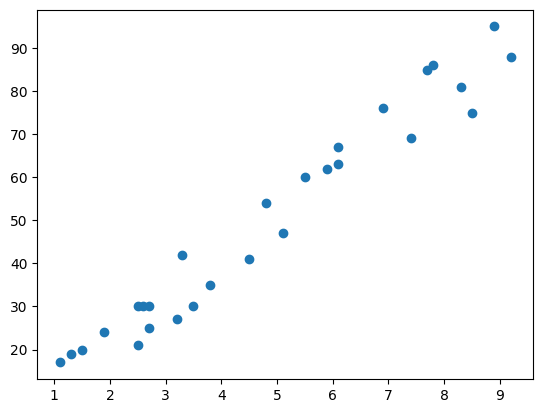

In [ ]:
plt.scatter(data.studytime, data.Scores) # Display our dataset as a scatterplot
# Where x axis is study time and y axis are the exam score

In [ ]:
# Function to calculate Mean Squared Error (MSE)

def loss_function(m, b, points):
  total_error = 0
  for i in range(len(points)):
    x = points.iloc[i].studytime
    y = points.iloc[i].Scores
    total_error += (y - (m * x + b)) ** 2
  return total_error / float(len(points))

In [ ]:
# Function to calculate gradient descent

def gradient_descent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0

  n = len(points)

  for i in range(n):
    x = points.iloc[i].studytime
    y = points.iloc[i].Scores

    m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
    b_gradient += -(2/n) * (y - (m_now * x + b_now))

  m = m_now - m_gradient * L
  b = b_now - b_gradient * L
  return (m, b)

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
9.905549377533982 1.8173121767181892


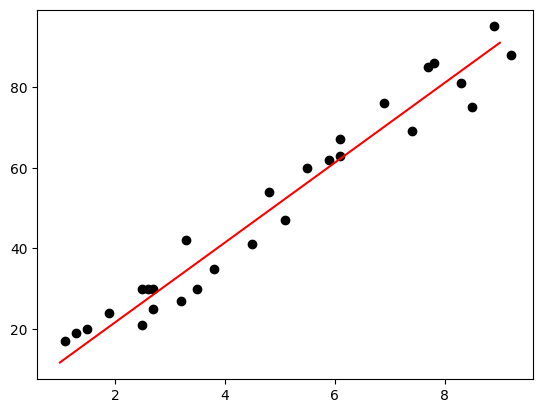

In [ ]:
# Plot

m = 0
b = 0
L = 0.001
epochs = 300

for i in range(epochs):
  if i % 50 == 0:
    print(f"Epoch: {i}")
  m, b = gradient_descent(m, b, data, L)

print(m, b)

plt.scatter(data.studytime, data.Scores, color="black")
plt.plot(list(range(1, 10)), [m * x + b for x in range(1, 10)], color="red")
plt.show()

In [ ]:
def splitData(data, test_precent=0.2):
  data = data.values.tolist()
  random.shuffle(data)
  split_index = int(len(data) * (1 - test_precent))
  training_set = data[:split_index]
  testing_set = data[split_index:]
  return training_set, testing_set

In [ ]:
train_set, test_set = splitData(data)
print(train_set)
print(test_set)
totalLen = len(train_set) + len(test_set)
print(totalLen)

[[4.8, 54.0], [2.5, 21.0], [7.4, 69.0], [2.7, 25.0], [7.7, 85.0], [8.3, 81.0], [6.1, 67.0], [1.3, 19.0], [6.1, 63.0], [1.1, 17.0], [6.9, 76.0], [5.1, 47.0], [5.9, 62.0], [1.5, 20.0], [8.5, 75.0], [9.2, 88.0], [2.6, 30.0], [3.8, 35.0], [8.9, 95.0], [3.3, 42.0], [2.5, 30.0], [2.7, 30.0]]
[[5.5, 60.0], [4.5, 41.0], [3.5, 30.0], [1.9, 24.0], [7.8, 86.0], [3.2, 27.0]]
28


In [ ]:
dfTrain = pd.DataFrame(train_set, columns=['study_time', 'score'])
dfTest = pd.DataFrame(test_set, columns=['study_time', 'score'])

In [ ]:
dfTrain.head()

,study_time,score
0,4.8,54.0
1,2.5,21.0
2,7.4,69.0
3,2.7,25.0
4,7.7,85.0


In [ ]:
dfTest.head()

,study_time,score
0,5.5,60.0
1,4.5,41.0
2,3.5,30.0
3,1.9,24.0
4,7.8,86.0


In [ ]:
dataAgain = pd.read_csv('finalDataFile.csv')

In [ ]:
def scorePredict(study_time, m, b):
  return m * study_time + b

In [ ]:
def evaluate_model(test_data, m, b):
    predictions = test_data['study_time'].apply(lambda x: scorePredict(x, m, b))
    mse = loss_function(m, b, dataAgain)
    return mse

In [ ]:
mse = evaluate_model(dfTest, m, b)
print("Mean Squared Error:", mse)

Mean Squared Error: 26.7735768614018


In [ ]:
predict_for = 10
predicted_score = scorePredict(predict_for, m, b)

if predicted_score > 100:
  predicted_score = 100

print(f"Predicted score for {predict_for} hours of study time: {predicted_score}")

Predicted score for 10 hours of study time: 100
